In [1]:
import sys
import os
import json

if 'google.colab' in sys.modules:
  print("You are in colab")
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/MyDrive/Otros/arms-robotic-system/jupyter_notebooks')
  !pip install pyngrok drake
  from pyngrok import ngrok

from pydrake.geometry import ( StartMeshcat )
from pydrake.geometry.optimization import (SaveIrisRegionsYamlFile,LoadIrisRegionsYamlFile) # type: ignore

# add parent folders to path
sys.path.append(os.path.abspath('..'))

# Update the import
from src.auxiliar_functions import (VisualizeConnectivity)
from src.gcs_trajectory_optimization import GcsTrajOpt, demo_trajectory_optimization
from src.iris_options import load_config, create_iris_options
from src.joint_teleop import JointTeleop
from src.gcs_helper import VisualizeRegions
from src.end_effector_teleop import EndEffectorTeleop

# Start the visualizer (only run this once).
meshcat = StartMeshcat()
if 'google.colab' in sys.modules:
  # Create a tunnel to the Meshcat server
  ngrok.set_auth_token("2rdws4UBYTqZ1NiiyEbJcWRnByV_7D9Jg8K3YVyZzbFMN1ysg")
  public_url = ngrok.connect(7000, "http")
  print(f"Meshcat is accessible at: {public_url}")

INFO:drake:Meshcat listening for connections at http://localhost:7001


In [2]:
parent_dir = os.path.abspath('..')
iris_regions = dict()

with open(os.path.join(parent_dir, 'common-files','gcs_seeds.json'), 'r') as f:
    iris_seeds = json.load(f)


if os.path.isfile(os.path.join(parent_dir, 'options.yaml')):
    config = load_config(os.path.join(parent_dir, 'options.yaml'))
    iris_filename = os.path.join(parent_dir,config["iris_regions_path"])
    if os.path.isfile(iris_filename):
        iris_regions.update(LoadIrisRegionsYamlFile(iris_filename))
        print(f"Loaded iris regions from {iris_filename}.")
    else:
        print(f"{iris_filename} not found. No previously computed regions were loaded.")

Loaded iris regions from /home/arath/github/arms-robotic-system/common-files/regions/my_regions.yaml.


In [3]:
with open(os.path.join(parent_dir, 'common-files','gcs_seeds.json'), 'r') as f:
    iris_seeds = json.load(f)
    iris_seeds = {key: iris_seeds[key] for key in iris_regions if key in iris_seeds}

In [4]:
len(iris_seeds),iris_seeds

(14,
 {'backwards': [0.0, 0.47, 1.0, 0.0, 0.0],
  'home': [0.0, 0.95, -1.33, -1.27, 0.0],
  'ketchup_in_front': [0.0, 0.65, -1.23, -0.96, 0.0],
  'ketchup_left': [0.53, -1.57, 0.0, 0.0, 0.0],
  'ketchup_right': [-0.53, -1.57, 0.0, 0.0, 0.0],
  'left_bin_pre_middle': [1.57, 1.57, -1.57, -1.57, 0.0],
  'left_bin_pre_up_1': [1.57, 0.79, -0.79, -1.57, 0.0],
  'left_bin_pre_up_2': [1.57, 0.2, -1.05, -1.05, 0.0],
  'left_bin_top_rack': [1.57, -0.12, -0.89, -0.76, 0],
  'right_bin_pre_middle': [1.57, 1.57, -1.57, -1.57, 0.0],
  'right_bin_pre_up_1': [1.57, 0.79, -0.79, -1.57, 0.0],
  'right_bin_pre_up_2': [1.57, 0.2, -1.05, -1.05, 0.0],
  'right_bin_top_rack': [1.57, -0.12, -0.89, -0.76, 0],
  'zero': [0.0, 0.0, 0.0, 0.0, 0.0]})

In [6]:
demo_trajectory_optimization(iris_regions, iris_seeds,meshcat)

q_start: [ 0.    0.65 -1.23 -0.96  0.  ]
q_goal: [ 0.    0.65 -1.23 -0.96  0.  ]


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 1 unique paths, discarded 99 duplicate paths.
INFO:drake:Finished 1 rounding solutions with Clp.


GCS solved in 1.290968894958496 seconds
time:  0.0 3e-06
running animation
q_start: [ 0.    0.65 -1.23 -0.96  0.  ]
q_goal: [0. 0. 0. 0. 0.]


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 6 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 2.7526917457580566 seconds
time:  0.0 3.514287714
running animation
q_start: [0. 0. 0. 0. 0.]
q_goal: [ 0.    0.65 -1.23 -0.96  0.  ]


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 16 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 2.8034088611602783 seconds
time:  0.0 3.514287714
running animation
q_start: [ 0.    0.65 -1.23 -0.96  0.  ]
q_goal: [ 1.57  0.79 -0.79 -1.57  0.  ]


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 5 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 5.755195140838623 seconds
time:  0.0 4.485716285428572
running animation
q_start: [ 1.57  0.79 -0.79 -1.57  0.  ]
q_goal: [ 0.    0.65 -1.23 -0.96  0.  ]


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 2 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 3.8576791286468506 seconds
time:  0.0 4.485716285514285
running animation
q_start: [ 0.    0.65 -1.23 -0.96  0.  ]
q_goal: [ 1.57  0.79 -0.79 -1.57  0.  ]


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 5 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 5.727985143661499 seconds
time:  0.0 4.485716285428572
running animation
q_start: [ 1.57  0.79 -0.79 -1.57  0.  ]
q_goal: [ 0.    0.65 -1.23 -0.96  0.  ]


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 2 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 5.785277843475342 seconds
time:  0.0 4.485716285514285
running animation
q_start: [ 0.    0.65 -1.23 -0.96  0.  ]
q_goal: [ 1.57 -0.12 -0.89 -0.76  0.  ]


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 8 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 11.648106336593628 seconds
time:  0.0 6.340862205395104
running animation
q_start: [ 1.57 -0.12 -0.89 -0.76  0.  ]
q_goal: [ 0.    0.65 -1.23 -0.96  0.  ]


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 1 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 16.234075784683228 seconds
time:  0.0 6.340862205395104
running animation
q_start: [ 0.    0.65 -1.23 -0.96  0.  ]
q_goal: [ 1.57  0.79 -0.79 -1.57  0.  ]


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 5 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 5.964883804321289 seconds
time:  0.0 4.485716285428572
running animation


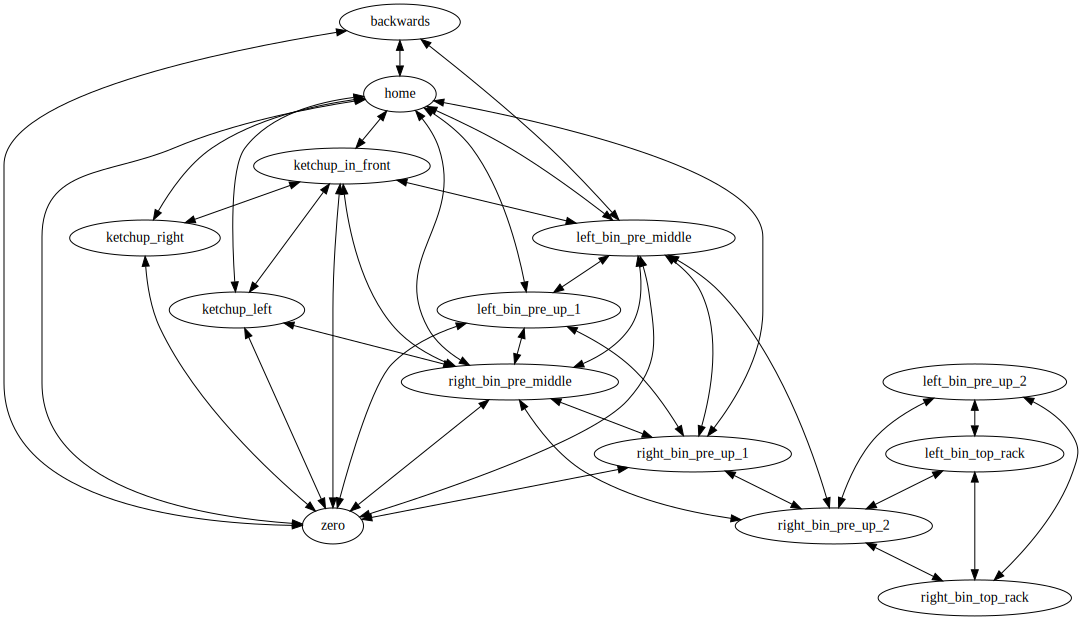

In [5]:
VisualizeConnectivity(iris_regions)

In [ ]:
#VisualizeRegions(meshcat, iris_regions)